<h1 style="background-color: #f8f0fa;
            border-left: 5px solid #1b4332;
            font-family: 'Trebuchet MS', sans-serif;
            border-right: 5px solid #1b4332;
            padding: 12px;
            border-radius: 50px 50px;
            color: #1b4332;
            text-align:center;
            font-size:45px;"><strong>😊Travel classification dataset using Random forest🌟</strong></h1>
<hr style="border-top: 5px solid #264653;">

<h1 style="background-color: #12f7ff;
           font-family: 'Trebuchet MS', sans-serif;
           color: #000;
           font-size: 150%;
           text-align: center;
           border-radius: 50px 50px;
           padding: 20px 20px ;
           margin: 30px 30px;
           box-shadow: 0 0 10px rgba(18,247,255,0.6),
    0 0 20px rgba(18,247,255,0.6),
    0 0 30px rgba(18,247,255,0.6),
    0 0 40px rgba(18,247,255,0.6);">
    🔻🌟 problem statement 🌟🔻
</h1>

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

<h1 style="background-color: #12f7ff;
           font-family: 'Trebuchet MS', sans-serif;
           color: #000;
           font-size: 150%;
           text-align: center;
           border-radius: 50px 50px;
           padding: 20px 20px ;
           margin: 30px 30px;
           box-shadow: 0 0 10px rgba(18,247,255,0.6),
    0 0 20px rgba(18,247,255,0.6),
    0 0 30px rgba(18,247,255,0.6),
    0 0 40px rgba(18,247,255,0.6);">
    🔻🌟1. Importing libraries & load the data🌟🔻
</h1>

In [89]:

# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

from sklearn.model_selection import train_test_split # splitting the data

from sklearn.preprocessing import OneHotEncoder, StandardScaler # {categorical}{numerical}

from sklearn.compose import ColumnTransformer # to apply multiple transformation

from sklearn.ensemble import RandomForestClassifier # model

from sklearn.metrics import accuracy_score, recall_score, \
                            confusion_matrix,f1_score, \
                            classification_report, precision_score # model evaluation
                            
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve

# for comparison
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# for hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [53]:
# load the data 
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [54]:
df.shape

(4888, 20)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<h1 style="background-color: #12f7ff;
           font-family: 'Trebuchet MS', sans-serif;
           color: #000;
           font-size: 150%;
           text-align: center;
           border-radius: 50px 50px;
           padding: 20px 20px ;
           margin: 30px 30px;
           box-shadow: 0 0 10px rgba(18,247,255,0.6),
    0 0 20px rgba(18,247,255,0.6),
    0 0 30px rgba(18,247,255,0.6),
    0 0 40px rgba(18,247,255,0.6);">
    🔻🌟2. Data Cleaning🌟🔻
</h1>

In [56]:
df['ProdTaken'].value_counts() # imbalanced dataset

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [57]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [58]:
# here we can combine the Fe Male column with the Female column
df['Gender'] = df['Gender'].replace({'Fe Male': 'Female'})

In [59]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [60]:
df['MaritalStatus'] = df['MaritalStatus'].replace({'Unmarried': 'Single'})

### checking Missing Values

In [61]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()* 100, 4), ' % missing values')

Age 4.6236  % missing values
TypeofContact 0.5115  % missing values
DurationOfPitch 5.135  % missing values
NumberOfFollowups 0.9206  % missing values
PreferredPropertyStar 0.5319  % missing values
NumberOfTrips 2.8642  % missing values
NumberOfChildrenVisiting 1.3502  % missing values
MonthlyIncome 4.7668  % missing values


In [62]:
# print some statistics about the numerical variables
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


## Imputing Null values: 

- **Impute Median value for numerical columns**
- **Impute Mode value for categorical columns**

In [63]:
# first let's get the numerical & categorical columns that have missing values 

num_cols = [col for col in features_with_na if df[col].dtype == np.number]
cat_cols = [col for col in features_with_na if col not in num_cols]

In [64]:
print(num_cols)
print(cat_cols)

['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
['TypeofContact']


In [65]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [66]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()* 100, 4), ' % missing values')

Age 0.0  % missing values
TypeofContact 0.0  % missing values
DurationOfPitch 0.0  % missing values
NumberOfFollowups 0.0  % missing values
PreferredPropertyStar 0.0  % missing values
NumberOfTrips 0.0  % missing values
NumberOfChildrenVisiting 0.0  % missing values
MonthlyIncome 0.0  % missing values


In [67]:
# we can remove the customerID It doesn't have any information

df = df.drop(columns=['CustomerID'],axis=1)

In [68]:
print(df.columns)

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


In [69]:
# here we have 'Number of person Visiting' and 'Number of children Visiting' so we can combine them both
# then we can remove the two features

df['TotalVising'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df = df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1)

In [70]:
# we can create two variable one for numerical features and one for categorical ones 

numerical_f = [col for col in df.columns if df[col].dtype != 'O']
categorical_f = [col for col in df.columns if col not in numerical_f]

print(len(numerical_f))
print(len(categorical_f))

12
6


In [71]:
# we can extract also the discrete feature  {ex:  the number of rooms in a house "1 or 2 or 3"}

discrete_f = [col for col in numerical_f if len(df[col].unique()) <= 25]
continuos_f = [col for col in numerical_f if col not in discrete_f]

print(len(discrete_f))
print(len(continuos_f))

9
3


<h1 style="background-color: #12f7ff;
           font-family: 'Trebuchet MS', sans-serif;
           color: #000;
           font-size: 150%;
           text-align: center;
           border-radius: 50px 50px;
           padding: 20px 20px ;
           margin: 30px 30px;
           box-shadow: 0 0 10px rgba(18,247,255,0.6),
    0 0 20px rgba(18,247,255,0.6),
    0 0 30px rgba(18,247,255,0.6),
    0 0 40px rgba(18,247,255,0.6);">
    🔻🌟3. Train test split and Model training🌟🔻
</h1>

In [72]:
X = df.drop(columns='ProdTaken')
y = df['ProdTaken']

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [73]:
numerical_f

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVising']

In [74]:
# i need just to update the numerical feature 
# i will remove the target column 'ProdTaken'

numerical_f.remove("ProdTaken")

In [75]:
# column transformation 

numeric_t = StandardScaler()
oh_t = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_t, categorical_f),
        ("StandardScaler", numeric_t, numerical_f)
    ]
)
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['TypeofContact', 'Occupation', 'Gender',
                                  'ProductPitched', 'MaritalStatus',
                                  'Designation']),
                                ('StandardScaler', StandardScaler(),
                                 ['Age', 'CityTier', 'DurationOfPitch',
                                  'NumberOfFollowups', 'PreferredPropertyStar',
                                  'NumberOfTrips', 'Passport',
                                  'PitchSatisfactionScore', 'OwnCar',
                                  'MonthlyIncome', 'TotalVising'])])

In [76]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [80]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 
    model_train_precision = precision_score(y_train, y_train_pred) 
    model_train_recall = recall_score(y_train, y_train_pred) 
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred) 
    model_test_recall = recall_score(y_test, y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) 


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8460
- F1 score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
----------------------------------
Model performance for Test set
- Accuracy: 0.8364
- F1 score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- Roc Auc Score: 0.6307


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9151
- F1 score: 0.9145
- Precision: 0.7935
- Recall: 0.7644
- Roc Auc Score: 0.8581


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9264
- F1 score: 0.9211
- Precision: 0.9474
- Recall: 0.6597
- Roc Auc Score: 0.8254


Gradient Boost
Model performance for Training se

## Hyperparameter Tuning


In [81]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [83]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   ]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [85]:
model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        scoring="accuracy",
        verbose=2,
        n_jobs=-1,
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
    

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [88]:
# let's check if our new hyperparameter is better than the default one

models={
    
    "Random Forest":RandomForestClassifier(n_estimators=200,min_samples_split=2,
                                          max_features=8,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9366
- F1 score: 0.9324
- Precision: 0.9708
- Recall: 0.6963
- Roc Auc Score: 0.8456




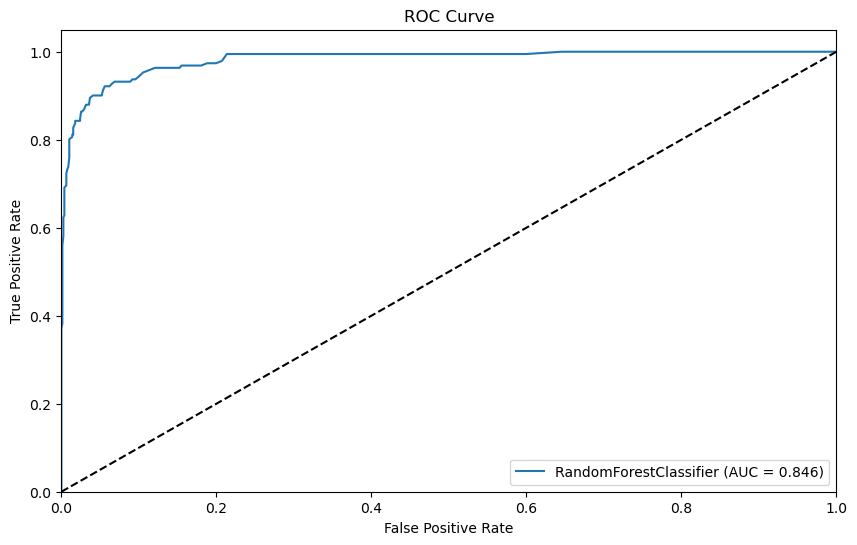

In [90]:
plt.figure(figsize=(10, 6))

auc_model = [
    {
        'label' : 'RandomForestClassifier',
        'model' : RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features=8,max_depth=None, random_state=42),
        'auc' : 0.8456
    }
]

for model in auc_model:
    model['model'].fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model['model'].predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr,label=model['label'] + ' (AUC = {:.3f})'.format(model['auc']))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()